<a href="https://colab.research.google.com/github/hsandaver/hsandaver/blob/main/Kandinsky_2_1_Batching_in_Google_Drive_%2B_Dynamic_Prompting_%2B_Symmetry_Option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kandinsky 2.1 - Batch Pictures/Google Drive + Dynamic Prompting
<i>(a fork by Quick-Eyed Sky)</i>

I just cleaned up the settings, allowed to batch pictures in your Google Drive, and added <b>Dynamic Prompting</b>.<br>

(Dynamic Prompting is a simple trick that chooses randomly words in lists written like this: "Photo of a {car|train|truck} in the {sun|rain|evening|mist}).

Have fun!

Patreon: https://www.patreon.com/Quick_Eyed_Sky<br>
YouTube: Quick-Eyed Sky<br>

<img src="https://raw.githubusercontent.com/Quick-Eyed-Sky/Images/main/Mystical_Butterfly_Spaceship_0.png" width="70%" alt="Alt text">

The original colab is here: https://colab.research.google.com/drive/1xSbu-b-EwYd6GdaFPRVgvXBX_mciZ41e?usp=sharing

Github: https://github.com/ai-forever/Kandinsky-2

HuggingFace: https://huggingface.co/ai-forever/Kandinsky_2.1

In [ ]:
#@title Check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8b69ad01-fd50-d60c-f294-982c19a28b00)


In [ ]:
#@title Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
#@title Installation
!pip install 'git+https://github.com/ai-forever/Kandinsky-2.git'
!pip install git+https://github.com/openai/CLIP.git

from kandinsky2 import get_kandinsky2

In [ ]:
#@title Downloads
model = get_kandinsky2('cuda', task_type='text2img', cache_dir='/tmp/kandinsky2', model_version='2.1', use_flash_attention=False)

In [ ]:
#@title Settings & Prompt 
batch_name = "Batch" #@param {type:"string"}
width_height = [768, 768] #@param {type: 'raw'}
#@markdown - Dynamic Prompting: "a glass of { wine | beer | milk }" will randomly choose one of these words for each image:
text_prompt = "Mystical {Butterfly|Titan|Spider|Dragon} in the {space|mist|rain}" #@param {type:"string"}
num_steps = 75 #@param {type:"integer"}
batch_size = 25 #@param {type:"integer"}
guidance_scale = 4 #@param {type:"number"}
sampler = 'p_sampler' #@param {type:"string"}
prior_cf_scale = 4 #@param {type:"number"}
prior_steps = "5" #@param {type:"string"}

w, h = width_height

Image 10 saved to Google Drive at: /content/drive/MyDrive/Batch/Mystical_Butterfly_Spaceship_9.png


  0%|          | 0/50 [00:00<?, ?it/s]

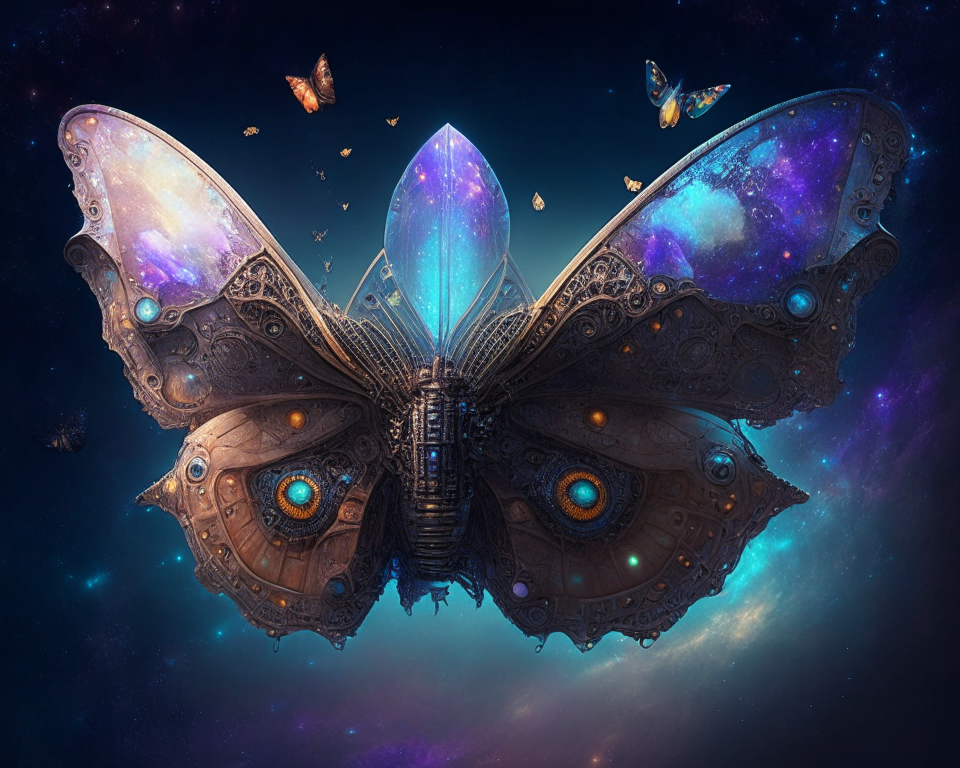

Image 11 saved to Google Drive at: /content/drive/MyDrive/Batch/Mystical_Butterfly_Spaceship_10.png


  0%|          | 0/50 [00:00<?, ?it/s]

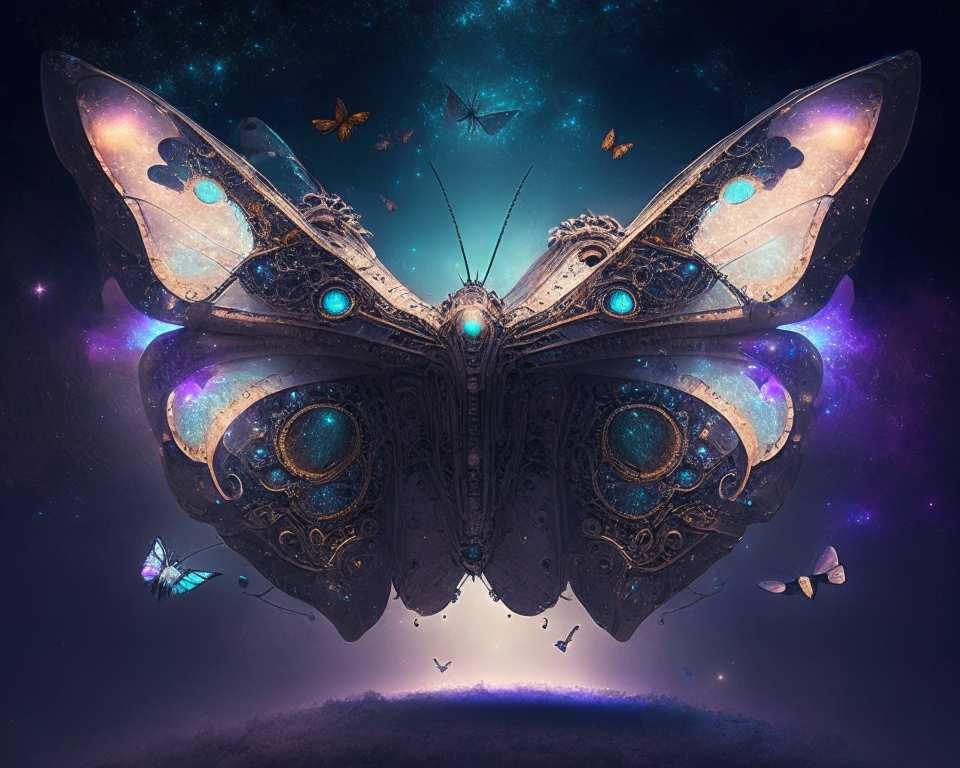

Image 12 saved to Google Drive at: /content/drive/MyDrive/Batch/Mystical_Butterfly_Spaceship_11.png


In [ ]:
#@title Images Generation
import os
import random
from PIL import Image
from IPython.display import display, clear_output
import time

def generate_dynamic_prompt(prompt):
    while "{" in prompt and "}" in prompt:
        start = prompt.index("{")
        end = prompt.index("}")
        options_str = prompt[start + 1:end]
        options = options_str.split("|")
        choice = random.choice(options).strip()
        prompt = prompt[:start] + choice + prompt[end + 1:]
    return prompt

output_folder = f"/content/drive/MyDrive/{batch_name}/"
os.makedirs(output_folder, exist_ok=True)

num_images = batch_size  # The total number of images to generate

for i in range(num_images):
    dynamic_prompt = generate_dynamic_prompt(text_prompt)
    print(f"Generating image {i + 1} with prompt: {dynamic_prompt}")  # Print the generated prompt
    images = model.generate_text2img(dynamic_prompt, num_steps=num_steps,
                                     batch_size=1, guidance_scale=guidance_scale,
                                     h=h, w=w, sampler=sampler, prior_cf_scale=prior_cf_scale,
                                     prior_steps=prior_steps)

    # Save generated image to Google Drive
    img_filename = f"{dynamic_prompt.replace(',', '').replace(' ', '_')}_{i}.png"
    img_path = os.path.join(output_folder, img_filename)
    
    # The output is already a PIL Image
    image = images[0]
    image.save(img_path)

    # Display image and clear output after every 10 images
    display(image)
    if (i + 1) % 10 == 0:
        time.sleep(1)
        clear_output(wait=True)

    print(f"Image {i + 1} saved to Google Drive at: {img_path}")
